In [5]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.LDQNStandard import LDQNStandard

import mo_gymnasium as mo_gym

env = mo_gym.make("mo-lunar-lander-v2", render_mode="rgb_array")

In [6]:
import torch

device = torch.device("cpu")#<--

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
hidden_size = 128
reward_size = 3 #<--
max_memory_size=10000
train_start = max_memory_size

#print(f"num_actions: {num_actions}")
#print(f"action_space: {action_space}")
#print(f"env.action_space: {env.action_space}")

agent = LDQNStandard(device=device, input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  reward_size=reward_size, max_memory_size=max_memory_size, train_start=train_start)


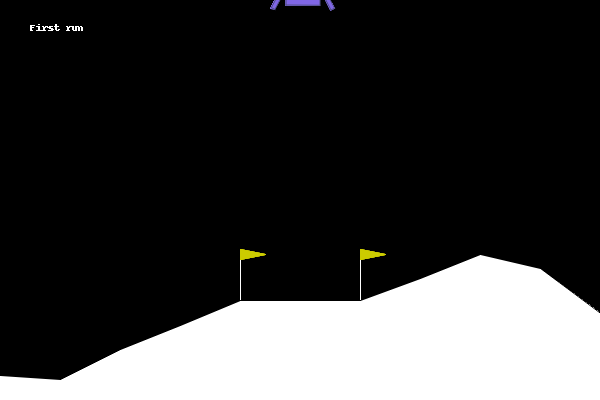

In [7]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

11:47:43	Episode	1	timesteps:	102	Took	0.038989 sec - reward:	[-100.0, -112.52368921763264, -20.0]	| 100AvgReward: [-100.0, -112.52368921763264, -20.0]
11:47:43	Episode	2	timesteps:	113	Took	0.025004 sec - reward:	[-100.0, -306.1915352344513, -24.0]	| 100AvgReward: [-100.0, -209.35761222604197, -22.0]
11:47:43	Episode	3	timesteps:	81	Took	0.017001 sec - reward:	[-100.0, -152.51002813875675, -24.0]	| 100AvgReward: [-100.0, -190.40841753028022, -22.666666666666668]
11:47:43	Episode	4	timesteps:	108	Took	0.023995 sec - reward:	[-100.0, -129.32825960218906, -34.0]	| 100AvgReward: [-100.0, -175.13837804825744, -25.5]
11:47:43	Episode	5	timesteps:	79	Took	0.017002 sec - reward:	[-100.0, 55.80512319505215, -17.0]	| 100AvgReward: [-100.0, -128.94967779959552, -23.8]
11:47:43	Episode	6	timesteps:	102	Took	0.020999 sec - reward:	[-100.0, 79.76335967704654, -23.0]	| 100AvgReward: [-100.0, -94.16417155348852, -23.666666666666668]
11:47:43	Episode	7	timesteps:	103	Took	0.022002 sec - reward:	[-100.

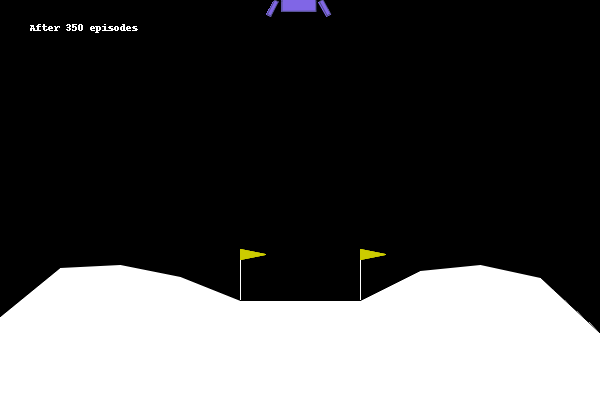

In [8]:
from IPython.display import Image as IpyImg

HOW_MANY_ITERATIONS = 1
EPISODES_PER_ITERATION = 350
REPLAY_FREQUENCY=4
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []


for i in range(HOW_MANY_ITERATIONS):
    rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES_PER_ITERATION, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=True)
    total_rewards += rewards
    total_avg_rewards += avg_rewards
    total_timings += timings
    title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
    total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
    display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [9]:
print(total_reward, num_timestep, elapsed_episode)

[-100.0, 95.07720297574997, -36.0] 92 0.490515


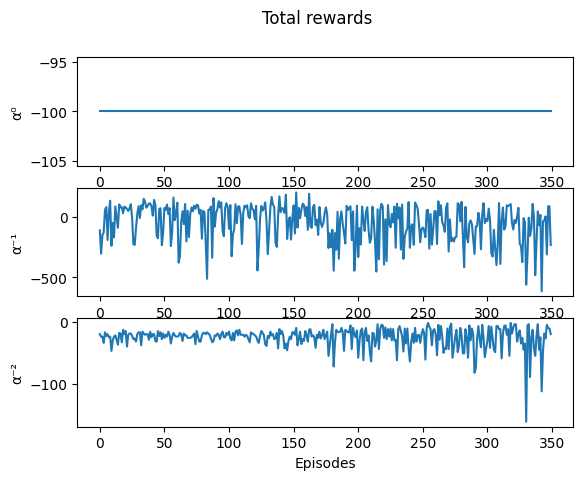

In [10]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(total_rewards, len(total_rewards), "Total rewards")

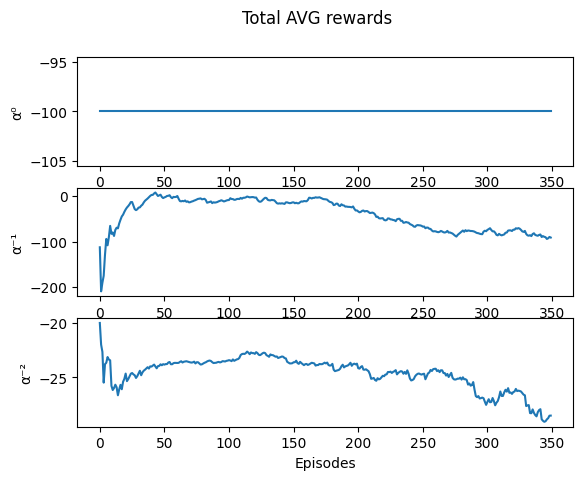

In [11]:
r = Ban.display_plot(total_avg_rewards, len(total_avg_rewards), "Total AVG rewards")